## Project:- Used car prices prediction 

#### we are given with a dataset of car price prediction.our objective is to find insights from this dataset and buuild a model which can predict car price accurately.

In [576]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#### importing Data

In [577]:
train_data=pd.read_csv('train-data.csv')

In [578]:
train_data.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [579]:
#HIGH RATED CAR

In [580]:
train_data[train_data['Price']==160]

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
4079,4079,Land Rover Range Rover 3.0 Diesel LWB Vogue,Hyderabad,2017,25000,Diesel,Automatic,First,13.33 kmpl,2993 CC,255 bhp,5.0,2.3 Cr,160.0


In [581]:
train_data['Name'].value_counts()

Mahindra XUV500 W8 2WD                    49
Maruti Swift VDI                          45
Maruti Swift Dzire VDI                    34
Honda City 1.5 S MT                       34
Maruti Swift VDI BSIV                     31
                                          ..
Porsche Cayman 2009-2012 S                 1
Tata Indica V2 DLE BSIII                   1
Hyundai Tucson 2.0 Dual VTVT 2WD AT GL     1
Maruti Baleno Vxi                          1
Hyundai Grand i10 Magna AT                 1
Name: Name, Length: 1876, dtype: int64

In [582]:
train_data['Name'].unique()

array(['Maruti Wagon R LXI CNG', 'Hyundai Creta 1.6 CRDi SX Option',
       'Honda Jazz V', ..., 'Volkswagen Polo IPL II 1.2 Petrol Highline',
       'Tata Bolt Revotron XT', 'Mahindra Xylo D4 BSIV'], dtype=object)

In [583]:
# sns.pairplot(df)

In [584]:
train_data.columns

Index(['Unnamed: 0', 'Name', 'Location', 'Year', 'Kilometers_Driven',
       'Fuel_Type', 'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power',
       'Seats', 'New_Price', 'Price'],
      dtype='object')

In [585]:
train_data.groupby('Price').count()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price
Price,,,,,,,,,,,,,
0.44,1,1,1,1,1,1,1,1,1,1,1,1,0
0.45,3,3,3,3,3,3,3,3,3,3,3,3,0
0.50,2,2,2,2,2,2,2,2,2,2,2,2,0
0.51,1,1,1,1,1,1,1,1,1,1,1,1,0
0.53,2,2,2,2,2,2,2,2,2,2,2,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
93.67,1,1,1,1,1,1,1,1,1,1,1,1,0
97.07,1,1,1,1,1,1,1,1,1,1,1,1,1
100.00,1,1,1,1,1,1,1,1,1,1,1,1,0


In [586]:
train_data.corr()

,Unnamed: 0,Year,Kilometers_Driven,Seats,Price
Unnamed: 0,1.000000,0.002354,-0.008734,-0.010832,-0.020275
Year,0.002354,1.000000,-0.173048,0.012333,0.305327
Kilometers_Driven,-0.008734,-0.173048,1.000000,0.083113,-0.011493
Seats,-0.010832,0.012333,0.083113,1.000000,0.052225
Price,-0.020275,0.305327,-0.011493,0.052225,1.000000


<AxesSubplot:>

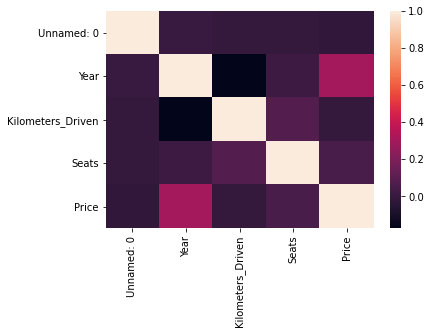

In [587]:
sns.heatmap(train_data.corr())

In [588]:
train_data.corr()['Price'].sort_values()

Unnamed: 0          -0.020275
Kilometers_Driven   -0.011493
Seats                0.052225
Year                 0.305327
Price                1.000000
Name: Price, dtype: float64

## Data Cleaning

In [589]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         6019 non-null   int64  
 1   Name               6019 non-null   object 
 2   Location           6019 non-null   object 
 3   Year               6019 non-null   int64  
 4   Kilometers_Driven  6019 non-null   int64  
 5   Fuel_Type          6019 non-null   object 
 6   Transmission       6019 non-null   object 
 7   Owner_Type         6019 non-null   object 
 8   Mileage            6017 non-null   object 
 9   Engine             5983 non-null   object 
 10  Power              5983 non-null   object 
 11  Seats              5977 non-null   float64
 12  New_Price          824 non-null    object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 658.5+ KB


First we converting object tyes into Interger values for milage,Engine and power

In [590]:
train_data

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,6014,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.4 kmpl,1248 CC,74 bhp,5.0,7.88 Lakh,4.75
6015,6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.4 kmpl,1120 CC,71 bhp,5.0,NaN,4.00
6016,6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.0 kmpl,2498 CC,112 bhp,8.0,NaN,2.90
6017,6017,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.9 kmpl,998 CC,67.1 bhp,5.0,NaN,2.65


In [591]:
train_data['Mileage']

0       26.6 km/kg
1       19.67 kmpl
2        18.2 kmpl
3       20.77 kmpl
4        15.2 kmpl
           ...    
6014     28.4 kmpl
6015     24.4 kmpl
6016     14.0 kmpl
6017     18.9 kmpl
6018    25.44 kmpl
Name: Mileage, Length: 6019, dtype: object

In [592]:
train_data=train_data.iloc[:,1:]

In [593]:
train_data.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [594]:
train_data.describe()

,Year,Kilometers_Driven,Seats,Price
count,6019.000000,6.019000e+03,5977.000000,6019.000000
mean,2013.358199,5.873838e+04,5.278735,9.479468
std,3.269742,9.126884e+04,0.808840,11.187917
min,1998.000000,1.710000e+02,0.000000,0.440000
25%,2011.000000,3.400000e+04,5.000000,3.500000
50%,2014.000000,5.300000e+04,5.000000,5.640000
75%,2016.000000,7.300000e+04,5.000000,9.950000
max,2019.000000,6.500000e+06,10.000000,160.000000


In [595]:
train_data.shape

(6019, 13)

In [596]:
# train_data['Kilometers_Driven'].value_counts()

In [597]:
print(train_data['Location'].unique())

['Mumbai' 'Pune' 'Chennai' 'Coimbatore' 'Hyderabad' 'Jaipur' 'Kochi'
 'Kolkata' 'Delhi' 'Bangalore' 'Ahmedabad']


In [598]:
print(train_data['Fuel_Type'].unique())

['CNG' 'Diesel' 'Petrol' 'LPG' 'Electric']


In [599]:
print(train_data['Transmission'].unique())

['Manual' 'Automatic']


In [600]:
print(train_data['Owner_Type'].unique())

['First' 'Second' 'Fourth & Above' 'Third']


#### any missing values??

In [601]:
train_data.isnull().sum()

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 36
Power                  36
Seats                  42
New_Price            5195
Price                   0
dtype: int64

In [602]:
train_data=train_data[train_data['Mileage'].notna()]
train_data=train_data[train_data['Power'].notna()]
train_data=train_data[train_data['Engine'].notna()]

In [603]:
train_data.shape

(5981, 13)

droping nan values

In [604]:
train_data=train_data.reset_index(drop=True)

## Feature Engineering

Now we are going to use only company name for simplicity...


In [605]:
train_data['Name'][0].split()[0]

'Maruti'

In [606]:
sample=train_data['Name'][:10]

In [607]:
for i in sample:
    splited=i.split()
    print(splited[0])

Maruti
Hyundai
Honda
Maruti
Audi
Hyundai
Nissan
Toyota
Volkswagen
Tata


In [608]:
new_list=[]
for i in train_data['Name']:
    splited=i.split()
    new_list.append(splited[0])
train_data['Company']=pd.DataFrame(new_list)   
    

Now apply for Milage, Engine, and Power

In [609]:
for i in range(train_data.shape[0]):
    
    train_data.at[i, 'Mileage(km/kg)'] = train_data['Mileage'][i].split()[0]
    train_data.at[i, 'Engine(CC)'] = train_data['Engine'][i].split()[0]
    train_data.at[i, 'Power(bhp)'] = train_data['Power'][i].split()[0]

In [610]:
train_data['Mileage(km/kg)'] = train_data['Mileage(km/kg)'].astype(float)
train_data['Engine(CC)'] = train_data['Engine(CC)'].astype(float)

In [611]:
#df['Engine']=df['Engine'].apply(lambda Engine: int(Engine[:3]))

now deal with null values of power

In [612]:
train_data['Power'][76]

'null bhp'

In [613]:
# train_data.head()

In [614]:
x = 'n'
count = 0
position = []
for i in range(train_data.shape[0]):
    if train_data['Power(bhp)'][i]=='null':
        x = 'Y'
        count = count + 1
        position.append(i)
print(x)
print(count)
print(position)

Y
107
[76, 79, 89, 120, 143, 225, 243, 260, 305, 306, 384, 422, 426, 441, 470, 573, 629, 645, 646, 736, 745, 825, 911, 922, 930, 1064, 1139, 1149, 1267, 1314, 1339, 1381, 1412, 1547, 1570, 1641, 1664, 1849, 1991, 2045, 2120, 2154, 2252, 2256, 2294, 2330, 2356, 2380, 2428, 2437, 2484, 2488, 2514, 2564, 2582, 2619, 2624, 2871, 3013, 3041, 3084, 3169, 3227, 3269, 3417, 3494, 3509, 3565, 3604, 3614, 3621, 3645, 3709, 3776, 3857, 3873, 3905, 3974, 4051, 4054, 4323, 4326, 4598, 4677, 4681, 4711, 4797, 4853, 4867, 4919, 5029, 5083, 5191, 5388, 5400, 5420, 5491, 5495, 5609, 5717, 5721, 5823, 5835, 5855, 5887, 5905, 5947]


In [615]:
# train_data = train_data.drop(train_data.index[position])
# train_data = train_data.reset_index(drop=True)
# train_data['Power(bhp)'] = train_data['Power(bhp)'].astype(float)

In [616]:
# train_data.head()

In [617]:
for i in range(train_data.shape[0]):
    if pd.isnull(train_data.loc[i,'New_Price']) == False:
        train_data.at[i,'New_car_Price'] = train_data['New_Price'][i].split()[0]

In [618]:
train_data['New_car_Price']=train_data['New_car_Price'].astype(float)

Now lets deleting useless featues

In [619]:
train_data.drop(["Name"],axis=1,inplace=True)
train_data.drop(["Mileage"],axis=1,inplace=True)
train_data.drop(["Engine"],axis=1,inplace=True)
train_data.drop(["Power"],axis=1,inplace=True)
train_data.drop(["New_Price"],axis=1,inplace=True)

## Data Visualization

In [620]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5981 entries, 0 to 5980
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Location           5981 non-null   object 
 1   Year               5981 non-null   int64  
 2   Kilometers_Driven  5981 non-null   int64  
 3   Fuel_Type          5981 non-null   object 
 4   Transmission       5981 non-null   object 
 5   Owner_Type         5981 non-null   object 
 6   Seats              5975 non-null   float64
 7   Price              5981 non-null   float64
 8   Company            5981 non-null   object 
 9   Mileage(km/kg)     5981 non-null   float64
 10  Engine(CC)         5981 non-null   float64
 11  Power(bhp)         5981 non-null   object 
 12  New_car_Price      823 non-null    float64
dtypes: float64(5), int64(2), object(6)
memory usage: 607.6+ KB


In [621]:
train_data['Price'].describe()

count    5981.000000
mean        9.495133
std        11.202164
min         0.440000
25%         3.500000
50%         5.650000
75%         9.950000
max       160.000000
Name: Price, dtype: float64

target columns

C:\Users\HP\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


(0.0, 160.0)

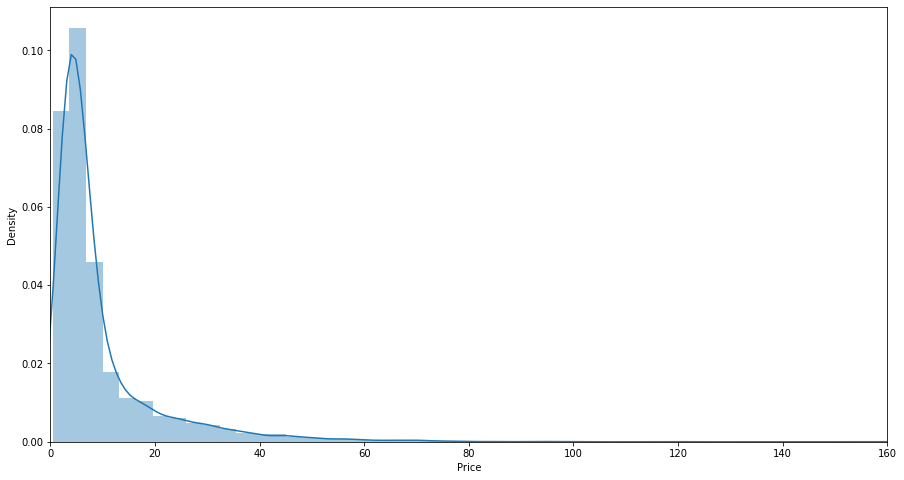

In [622]:
plt.figure(figsize=(15,8))
sns.distplot(train_data['Price'])
plt.xlim([0,160])

### Fuel Type

In [623]:
train_data['Fuel_Type'].describe()

count       5981
unique         4
top       Diesel
freq        3197
Name: Fuel_Type, dtype: object

In [624]:
train_data['Fuel_Type'].unique()

array(['CNG', 'Diesel', 'Petrol', 'LPG'], dtype=object)

<AxesSubplot:xlabel='Fuel_Type', ylabel='Price'>

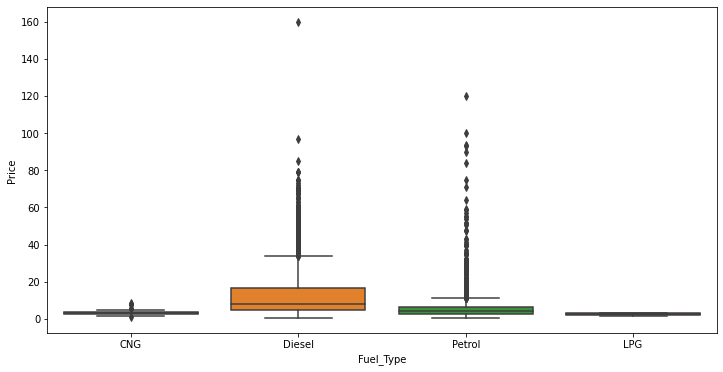

In [625]:
plt.figure(figsize=(12,6))
sns.boxplot(data=train_data,y='Price',x='Fuel_Type')

### Year

<AxesSubplot:xlabel='Year', ylabel='Price'>

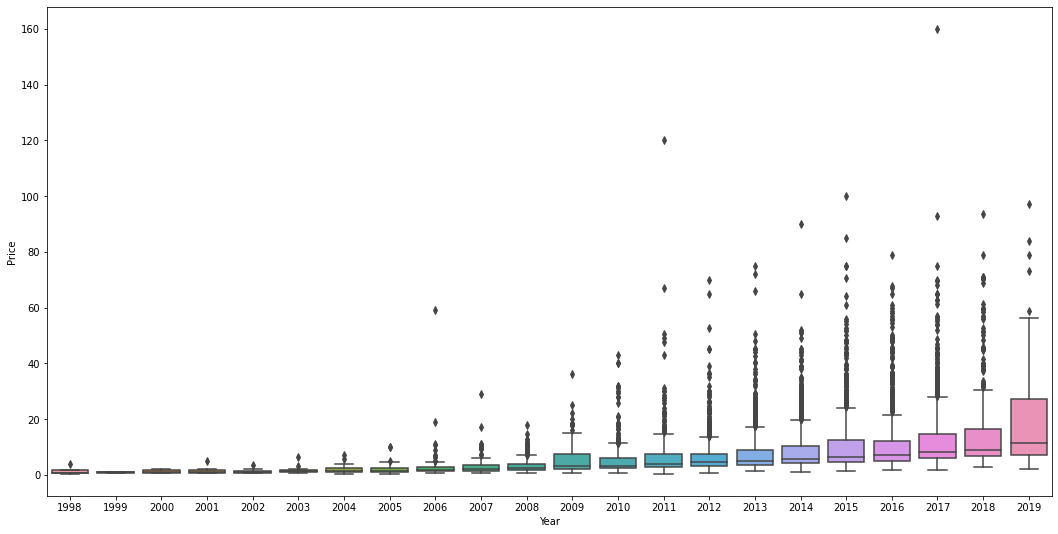

In [626]:
plt.figure(figsize=(18,9))
sns.boxplot(x='Year',y='Price',data=train_data)

#### owner type

<AxesSubplot:xlabel='Owner_Type', ylabel='Price'>

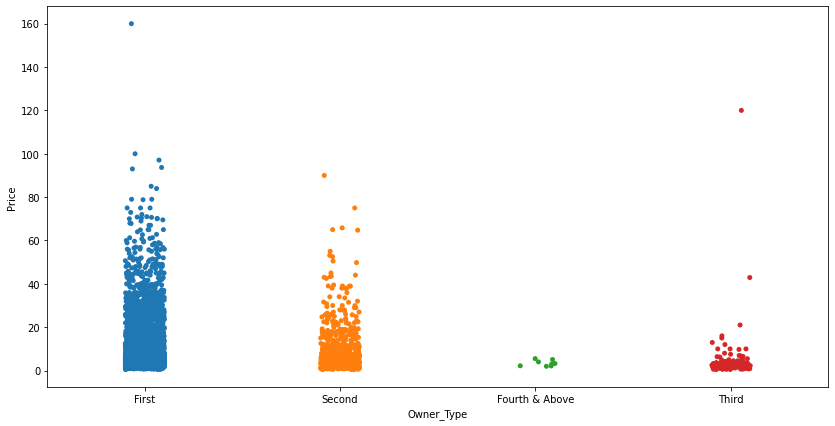

In [627]:
plt.figure(figsize=(14,7))
sns.stripplot(x='Owner_Type',y='Price',data=train_data)

#### Company

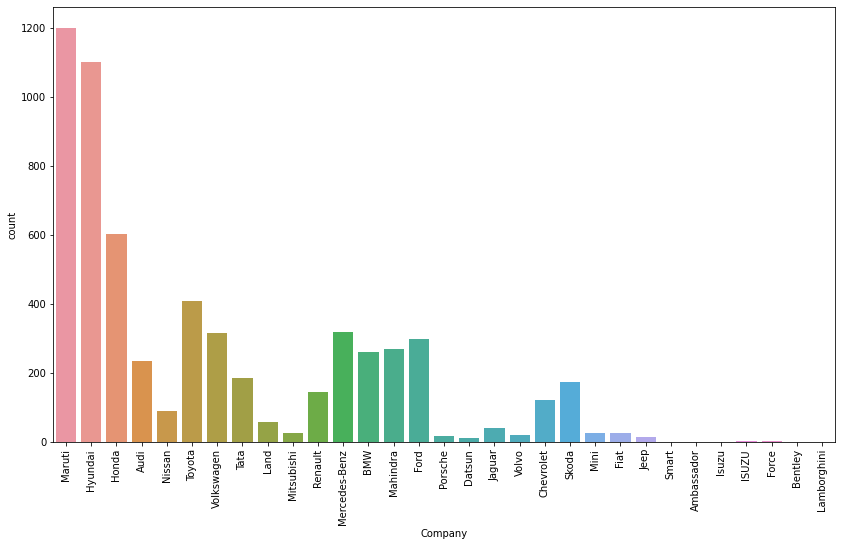

In [628]:
plt.figure(figsize=(14,8))
sns.countplot(x='Company',data=train_data)
plt.xticks(rotation=90);

# Deal with Categorical Data

As for now we have left with only 5 categorical features:
1. Location
2. Fuel_Type
3. Transmission
4. Owner_Type
5. Company

#### Location

In [629]:
train_data['Location'].value_counts()

Mumbai        785
Hyderabad     741
Kochi         648
Coimbatore    634
Pune          613
Delhi         549
Kolkata       531
Chennai       492
Jaipur        411
Bangalore     354
Ahmedabad     223
Name: Location, dtype: int64

In [630]:

# Plot Location vs Price
# sns.catplot(y='Price',x=var,data= train_data.sort_values('Price',ascending=False),kind="boxen",height=6, aspect=3)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

#### Owner type

In [631]:
var='Owner_Type'

<AxesSubplot:xlabel='Owner_Type', ylabel='Price'>

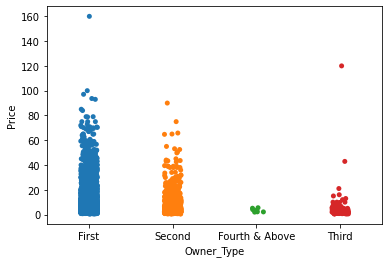

In [632]:
sns.stripplot(x=var,y='Price',data=train_data)

#### Company

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]),
 [Text(0, 0, 'Maruti'),
  Text(1, 0, 'Hyundai'),
  Text(2, 0, 'Honda'),
  Text(3, 0, 'Audi'),
  Text(4, 0, 'Nissan'),
  Text(5, 0, 'Toyota'),
  Text(6, 0, 'Volkswagen'),
  Text(7, 0, 'Tata'),
  Text(8, 0, 'Land'),
  Text(9, 0, 'Mitsubishi'),
  Text(10, 0, 'Renault'),
  Text(11, 0, 'Mercedes-Benz'),
  Text(12, 0, 'BMW'),
  Text(13, 0, 'Mahindra'),
  Text(14, 0, 'Ford'),
  Text(15, 0, 'Porsche'),
  Text(16, 0, 'Datsun'),
  Text(17, 0, 'Jaguar'),
  Text(18, 0, 'Volvo'),
  Text(19, 0, 'Chevrolet'),
  Text(20, 0, 'Skoda'),
  Text(21, 0, 'Mini'),
  Text(22, 0, 'Fiat'),
  Text(23, 0, 'Jeep'),
  Text(24, 0, 'Smart'),
  Text(25, 0, 'Ambassador'),
  Text(26, 0, 'Isuzu'),
  Text(27, 0, 'ISUZU'),
  Text(28, 0, 'Force'),
  Text(29, 0, 'Bentley'),
  Text(30, 0, 'Lamborghini')])

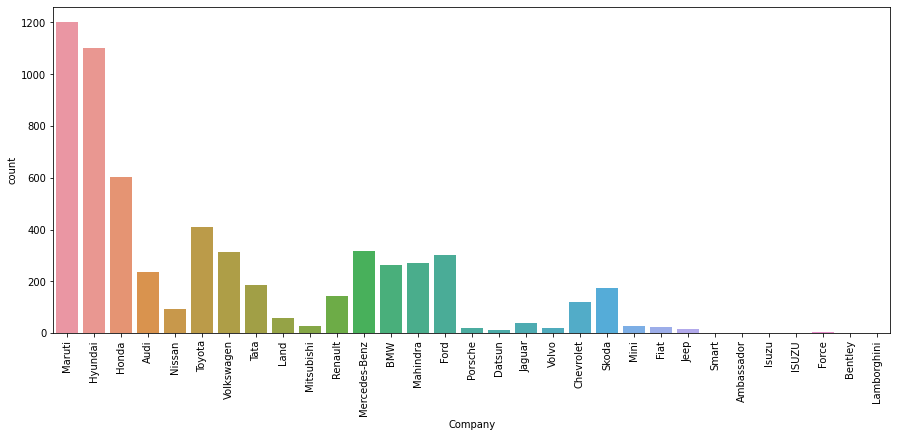

In [633]:
plt.figure(figsize=(15,6))
sns.countplot(x='Company',data=train_data)
plt.xticks(rotation=90)

## Feature Engineering 

In [634]:
var='Location'

In [635]:
train_data[var].value_counts()

Mumbai        785
Hyderabad     741
Kochi         648
Coimbatore    634
Pune          613
Delhi         549
Kolkata       531
Chennai       492
Jaipur        411
Bangalore     354
Ahmedabad     223
Name: Location, dtype: int64

One-hot-encoding

In [636]:
location=train_data['Location']

In [637]:
location=pd.get_dummies(location,drop_first=True)

In [638]:
location.head()

,Bangalore,Chennai,Coimbatore,Delhi,Hyderabad,Jaipur,Kochi,Kolkata,Mumbai,Pune
0,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,1
2,0,1,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0


#### Working fuel time

In [639]:
train_data['Fuel_Type'].value_counts()

Diesel    3197
Petrol    2718
CNG         56
LPG         10
Name: Fuel_Type, dtype: int64

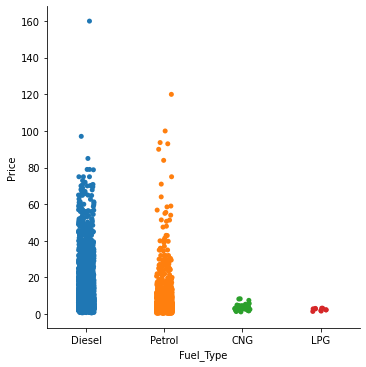

In [640]:
sns.catplot(x='Fuel_Type',y='Price',data=train_data.sort_values('Price',ascending=False))

In [641]:
def fuel_type(fuel):
    if fuel=='Diesel':
        return 3
    if fuel == 'Petrol':
        return 2
    if fuel=='CNG':
        return 1
    if fuel =='LPG':
        return 1

In [642]:
train_data['Fuel_Type']=train_data['Fuel_Type'].apply(fuel_type)

In [643]:
train_data['Fuel_Type'].value_counts()

3    3197
2    2718
1      56
0      10
Name: Fuel_Type, dtype: int64

#### owner type

In [644]:
train_data['Owner_Type'].value_counts()

First             4905
Second             957
Third              111
Fourth & Above       8
Name: Owner_Type, dtype: int64

In [645]:
train_data.replace({"First":1,'Second':2,'Third':3, 'Fourth & Above':4},inplace=True)

#### Transmission

In [646]:
train_data['Transmission'].value_counts()

Manual       4271
Automatic    1710
Name: Transmission, dtype: int64

<AxesSubplot:xlabel='Transmission', ylabel='Price'>

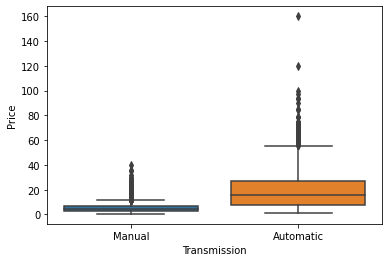

In [647]:
sns.boxplot(x='Transmission',y='Price',data=train_data.sort_values('Price',ascending=True))

In [648]:
Transmission=train_data['Transmission']
Transmission=pd.get_dummies(Transmission,drop_first=True)

In [649]:
train_data['Transmission']=Transmission

#### Company

In [650]:
train_data['Company'].value_counts()

Maruti           1200
Hyundai          1100
Honda             602
Toyota            409
Mercedes-Benz     318
Volkswagen        315
Ford              300
Mahindra          271
BMW               262
Audi              236
Tata              186
Skoda             173
Renault           145
Chevrolet         121
Nissan             91
Land               57
Jaguar             40
Mitsubishi         27
Mini               26
Fiat               25
Volvo              21
Porsche            18
Jeep               15
Datsun             13
Force               3
ISUZU               2
Isuzu               1
Smart               1
Ambassador          1
Lamborghini         1
Bentley             1
Name: Company, dtype: int64

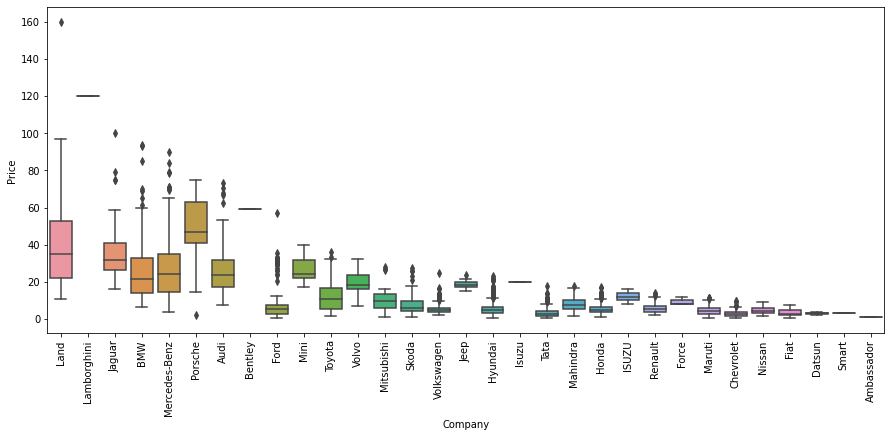

In [651]:
plt.figure(figsize=(15,6))
sns.boxplot(x='Company',y='Price',data=train_data.sort_values('Price',ascending=False))
plt.xticks(rotation=90);

In [652]:
# train_data=train_data.drop(['Company'],axis=1,inplace=True)
company=train_data['Company']
company=pd.get_dummies(company,drop_first=True)

In [653]:
final_train=pd.concat([train_data,location,company],axis=1)

In [654]:
final_train.columns

Index(['Location', 'Year', 'Kilometers_Driven', 'Fuel_Type', 'Transmission',
       'Owner_Type', 'Seats', 'Price', 'Company', 'Mileage(km/kg)',
       'Engine(CC)', 'Power(bhp)', 'New_car_Price', 'Bangalore', 'Chennai',
       'Coimbatore', 'Delhi', 'Hyderabad', 'Jaipur', 'Kochi', 'Kolkata',
       'Mumbai', 'Pune', 'Audi', 'BMW', 'Bentley', 'Chevrolet', 'Datsun',
       'Fiat', 'Force', 'Ford', 'Honda', 'Hyundai', 'ISUZU', 'Isuzu', 'Jaguar',
       'Jeep', 'Lamborghini', 'Land', 'Mahindra', 'Maruti', 'Mercedes-Benz',
       'Mini', 'Mitsubishi', 'Nissan', 'Porsche', 'Renault', 'Skoda', 'Smart',
       'Tata', 'Toyota', 'Volkswagen', 'Volvo'],
      dtype='object')

In [655]:
final_train=final_train.drop(['Location','Company'],axis=1)

In [656]:
final_train.head()

,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,Price,Mileage(km/kg),Engine(CC),Power(bhp),...,Mitsubishi,Nissan,Porsche,Renault,Skoda,Smart,Tata,Toyota,Volkswagen,Volvo
0,2010,72000,1,1,1,5.0,1.75,26.60,998.0,58.16,...,0,0,0,0,0,0,0,0,0,0
1,2015,41000,3,1,1,5.0,12.50,19.67,1582.0,126.2,...,0,0,0,0,0,0,0,0,0,0
2,2011,46000,2,1,1,5.0,4.50,18.20,1199.0,88.7,...,0,0,0,0,0,0,0,0,0,0
3,2012,87000,3,1,1,7.0,6.00,20.77,1248.0,88.76,...,0,0,0,0,0,0,0,0,0,0
4,2013,40670,3,0,2,5.0,17.74,15.20,1968.0,140.8,...,0,0,0,0,0,0,0,0,0,0


In [657]:
final_train.shape

(5981, 51)

### Final features 

In [658]:
final_train.columns

Index(['Year', 'Kilometers_Driven', 'Fuel_Type', 'Transmission', 'Owner_Type',
       'Seats', 'Price', 'Mileage(km/kg)', 'Engine(CC)', 'Power(bhp)',
       'New_car_Price', 'Bangalore', 'Chennai', 'Coimbatore', 'Delhi',
       'Hyderabad', 'Jaipur', 'Kochi', 'Kolkata', 'Mumbai', 'Pune', 'Audi',
       'BMW', 'Bentley', 'Chevrolet', 'Datsun', 'Fiat', 'Force', 'Ford',
       'Honda', 'Hyundai', 'ISUZU', 'Isuzu', 'Jaguar', 'Jeep', 'Lamborghini',
       'Land', 'Mahindra', 'Maruti', 'Mercedes-Benz', 'Mini', 'Mitsubishi',
       'Nissan', 'Porsche', 'Renault', 'Skoda', 'Smart', 'Tata', 'Toyota',
       'Volkswagen', 'Volvo'],
      dtype='object')

In [659]:
#final_train=final_train.drop(['Company'],axis=1)
final_train=final_train.dropna()

In [660]:
final_train.shape

(823, 51)

In [661]:
X=final_train.drop('Price',axis=1)

In [662]:
X.shape

(823, 50)

In [663]:
X

,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,Mileage(km/kg),Engine(CC),Power(bhp),New_car_Price,...,Mitsubishi,Nissan,Porsche,Renault,Skoda,Smart,Tata,Toyota,Volkswagen,Volvo
2,2011,46000,2,1,1,5.0,18.20,1199.0,88.7,8.61,...,0,0,0,0,0,0,0,0,0,0
7,2016,36000,3,0,1,8.0,11.36,2755.0,171.5,21.00,...,0,0,0,0,0,0,0,1,0,0
10,2018,25692,2,1,1,5.0,21.56,1462.0,103.25,10.65,...,0,0,0,0,0,0,0,0,0,0
15,2014,110000,3,1,1,7.0,13.50,2477.0,175.56,32.01,...,1,0,0,0,0,0,0,0,0,0
20,2014,32982,3,0,1,5.0,22.69,1995.0,190,47.87,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5961,2016,10000,2,1,1,5.0,17.57,1193.0,88.7,7.77,...,0,0,0,0,0,0,1,0,0,0
5964,2011,38000,2,1,1,5.0,16.09,1598.0,103.5,11.91,...,0,0,0,0,0,0,0,0,1,0
5967,2016,37208,3,1,1,5.0,24.30,1248.0,88.5,9.93,...,0,0,0,0,0,0,0,0,0,0
5972,2013,33746,2,1,1,5.0,18.50,1198.0,86.8,6.63,...,0,0,0,0,0,0,0,0,0,0


In [664]:
#final_train['Company']

<AxesSubplot:>

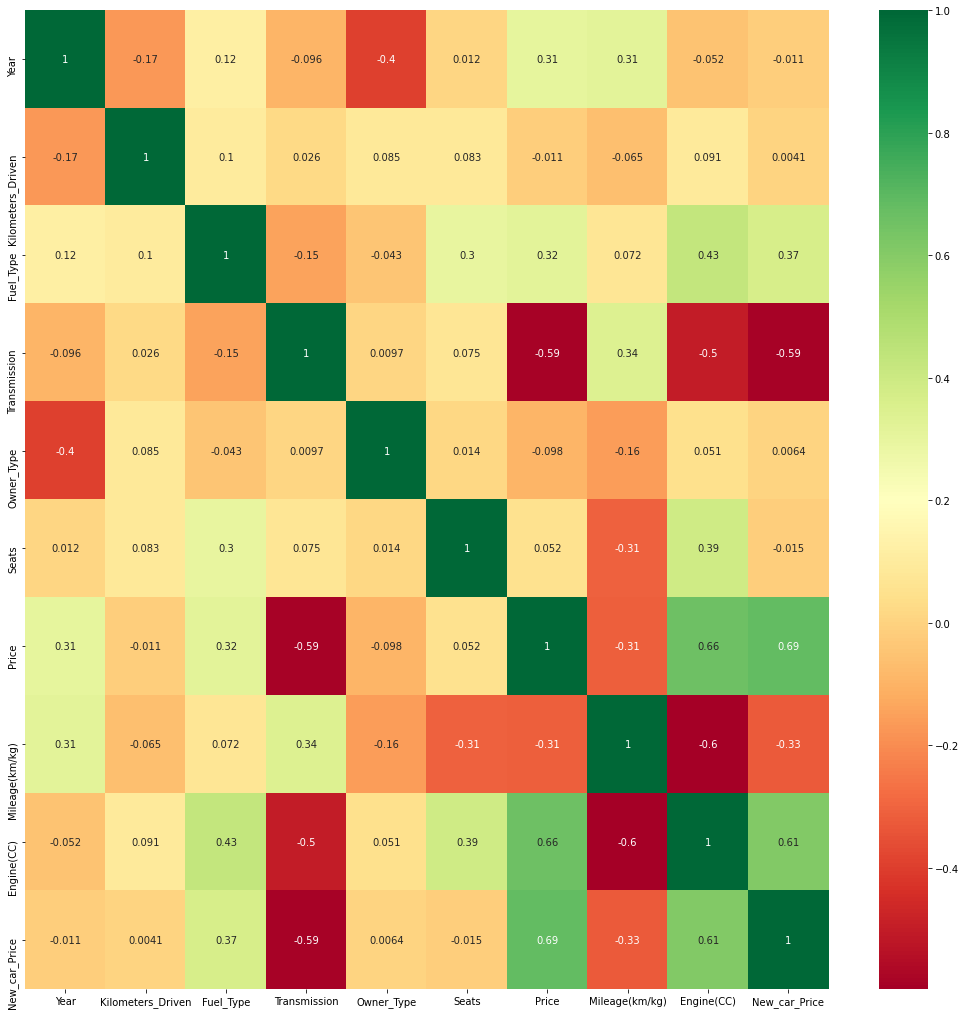

In [665]:
plt.figure(figsize=(18,18))
sns.heatmap(train_data.corr(),annot=True,cmap='RdYlGn')

In [666]:
train_data.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,Price,Company,Mileage(km/kg),Engine(CC),Power(bhp),New_car_Price
0,Mumbai,2010,72000,1,1,1,5.0,1.75,Maruti,26.60,998.0,58.16,NaN
1,Pune,2015,41000,3,1,1,5.0,12.50,Hyundai,19.67,1582.0,126.2,NaN
2,Chennai,2011,46000,2,1,1,5.0,4.50,Honda,18.20,1199.0,88.7,8.61
3,Chennai,2012,87000,3,1,1,7.0,6.00,Maruti,20.77,1248.0,88.76,NaN
4,Coimbatore,2013,40670,3,0,2,5.0,17.74,Audi,15.20,1968.0,140.8,NaN


In [667]:
final_test.dtypes


Year                     int64
Kilometers_Driven        int64
Owner_Type               int64
Seats                  float64
Mileage(km/kg)         float64
Engine(CC)             float64
Power(bhp)              object
Location_Bangalore       uint8
Location_Chennai         uint8
Location_Coimbatore      uint8
Location_Delhi           uint8
Location_Hyderabad       uint8
Location_Jaipur          uint8
Location_Kochi           uint8
Location_Kolkata         uint8
Location_Mumbai          uint8
Location_Pune            uint8
Fuel_Type_Diesel         uint8
Fuel_Type_LPG            uint8
Fuel_Type_Petrol         uint8
Transmission_Manual      uint8
dtype: object

In [668]:
final_test.shape

(1223, 21)

In [670]:
final_train['Power(bhp)'].dtype

dtype('O')

In [671]:
final_train['Power(bhp)']=final_train['Power(bhp)'].astype(float)

In [675]:
X=final_train.drop('Price',axis=1)
y=final_train['Price']

Now let's see which feature is more important for price

In [676]:
final_train.corr()['Price'].sort_values(ascending=False)

Price                1.000000
Power(bhp)           0.777187
Engine(CC)           0.696675
New_car_Price        0.686618
Mercedes-Benz        0.531823
Land                 0.398559
Fuel_Type            0.324056
Audi                 0.251735
Year                 0.227202
BMW                  0.188644
Mini                 0.140353
Jaguar               0.129298
Coimbatore           0.101194
Toyota               0.067171
Hyderabad            0.060823
Jeep                 0.046523
Seats                0.046168
Volvo                0.040126
Kochi                0.037461
Mumbai               0.025268
Bangalore            0.017541
Isuzu                0.014919
Mitsubishi           0.014064
Skoda                0.001768
Delhi               -0.017456
Fiat                -0.026180
Porsche             -0.027308
Ford                -0.032469
Owner_Type          -0.050240
Pune                -0.062066
Datsun              -0.065512
Chennai             -0.074553
Nissan              -0.079586
Mahindra  

### Train Test Split

In [678]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

## Model building and training

In [679]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 576 entries, 1196 to 3760
Data columns (total 50 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               576 non-null    int64  
 1   Kilometers_Driven  576 non-null    int64  
 2   Fuel_Type          576 non-null    int64  
 3   Transmission       576 non-null    uint8  
 4   Owner_Type         576 non-null    int64  
 5   Seats              576 non-null    float64
 6   Mileage(km/kg)     576 non-null    float64
 7   Engine(CC)         576 non-null    float64
 8   Power(bhp)         576 non-null    float64
 9   New_car_Price      576 non-null    float64
 10  Bangalore          576 non-null    uint8  
 11  Chennai            576 non-null    uint8  
 12  Coimbatore         576 non-null    uint8  
 13  Delhi              576 non-null    uint8  
 14  Hyderabad          576 non-null    uint8  
 15  Jaipur             576 non-null    uint8  
 16  Kochi              576

### TreesRegressor 

In [680]:
from sklearn.ensemble import ExtraTreesRegressor 

In [681]:
selection= ExtraTreesRegressor()

In [682]:
selection.fit(X_train,y_train)

ExtraTreesRegressor()

In [683]:
predictions=selection.predict(X_test)

In [684]:
from sklearn.metrics import classification_report

In [685]:
selection.score(X_test,predictions)

1.0

In [686]:
selection.score(X_train,y_train)

1.0

In [687]:
pred=pd.DataFrame(predictions)

In [688]:
# pred['y_test']=pd.DataFrame(y_test)

In [689]:
y_df= pd.DataFrame(y_test)
y_df['predictions']=pd.DataFrame(predictions)

In [690]:
y_test[:10], #print(predictions)

(1717     8.20
 5731     6.94
 2328    28.90
 1486     5.80
 2053    19.05
 1330    67.00
 4456     3.40
 1986     7.12
 3531    22.20
 3526    12.00
 Name: Price, dtype: float64,)

#### Model Evaluation

In [692]:
print("model Accuracy is :",selection.score(X_test,y_test))

model Accuracy is : 0.9410337861238902


### Linear Regression

In [699]:
from sklearn.linear_model import LinearRegression

In [700]:
model=LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [701]:
predict_lr=model.predict(X_test)

#### Model Eavaluation

In [702]:
print('Model Accuracy is for Linear Regression',model.score(X_test, y_test))

Model Accuracy is for Linear Regression 0.8926741564630165


#### Now let's see some Predictions

In [ ]:
loc_index = np.where(X.columns==location)[0][0]

In [776]:
company='Mitsubishi'
location='Mumbai'

In [786]:

company_ind=np.where(X.columns==company)[0][0]
location_ind=np.where(X.columns==location)[0][0]
x=np.zeros(len(X.columns))
x[0] = 2013 #Year
x[1] = 59000 #Kilometers_Driven
x[2] = 3 #Fuel_Type
x[3] = 1 #Transmission
x[4] = 1 #Owner_Type
x[5] = 7.0 #Seats
x[6] = 13.50 #Mileage(km/kg)
x[7] = 2477.0 #Engine(CC)
x[8] = 175.56 #Power(bhp)
x[9] = 33.09 #New_car_Price

x[location_ind]=1
x[company_ind]=1

print('predicted price is:',model.predict([x])[0])


predicted price is: 13.814454351536824


In [808]:
X_train[:1]

,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,Mileage(km/kg),Engine(CC),Power(bhp),New_car_Price,...,Mitsubishi,Nissan,Porsche,Renault,Skoda,Smart,Tata,Toyota,Volkswagen,Volvo
1196,2013,59000,3,1,1,7.0,13.5,2477.0,175.56,33.09,...,1,0,0,0,0,0,0,0,0,0


In [792]:
print('Car Price is Rs:',round(model.predict(X_train)[0],2),'Lakh')


Car Price is Rs: 13.81 Lakh


In [806]:
y_train[:1]

1196    12.75
Name: Price, dtype: float64

#### Change index names

In [810]:
X.columns

Index(['Year', 'Kilometers_Driven', 'Fuel_Type', 'Transmission', 'Owner_Type',
       'Seats', 'Mileage(km/kg)', 'Engine(CC)', 'Power(bhp)', 'New_car_Price',
       'Bangalore', 'Chennai', 'Coimbatore', 'Delhi', 'Hyderabad', 'Jaipur',
       'Kochi', 'Kolkata', 'Mumbai', 'Pune', 'Audi', 'BMW', 'Bentley',
       'Chevrolet', 'Datsun', 'Fiat', 'Force', 'Ford', 'Honda', 'Hyundai',
       'ISUZU', 'Isuzu', 'Jaguar', 'Jeep', 'Lamborghini', 'Land', 'Mahindra',
       'Maruti', 'Mercedes-Benz', 'Mini', 'Mitsubishi', 'Nissan', 'Porsche',
       'Renault', 'Skoda', 'Smart', 'Tata', 'Toyota', 'Volkswagen', 'Volvo'],
      dtype='object')

In [813]:
X_train = X_train.rename(columns={'Mileage(km/kg)': 'Mileage','Engine(CC)':'Engine','Power(bhp)':'Power'})

In [816]:
X_train.head(1)

,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,Mileage,Engine,Power,New_car_Price,...,Mitsubishi,Nissan,Porsche,Renault,Skoda,Smart,Tata,Toyota,Volkswagen,Volvo
1196,2013,59000,3,1,1,7.0,13.5,2477.0,175.56,33.09,...,1,0,0,0,0,0,0,0,0,0


In [815]:
def predict_price(company,location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,Mileage,Engine,Power,New_car_Price):
    company=np.where(X.columns==company)[0][0]
    location=np.where(X.columns==location)[0][0]
    x=np.zeros(len(X.columns))
    x[0] = Year
    x[1] = Kilometers_Driven
    x[2] = Fuel_Type
    x[3] = Transmission
    x[4] = Owner_Type
    x[5] = Seats
    x[6] = Mileage
    x[7] = Engine
    x[8] = Power
    x[9] = New_car_Price

    x[location_ind]=1
    x[company_ind]=1

    return model.predict([x])[0]

In [847]:
predict_price('Tata','Coimbatore',2019,20712,2,1,1,5.0,23.84,1199.0,84.0,6.59)

4.974643868725252

In [849]:
X_test[1:2]

,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,Mileage(km/kg),Engine(CC),Power(bhp),New_car_Price,...,Mitsubishi,Nissan,Porsche,Renault,Skoda,Smart,Tata,Toyota,Volkswagen,Volvo
5731,2019,20712,2,1,1,5.0,23.84,1199.0,84.0,6.59,...,0,0,0,0,0,0,1,0,0,0


In [850]:
# X_test['Coimbatore']

In [858]:
import json
columns={
    'data_columns':[col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))

In [895]:
columns['data_columns']

['year',
 'kilometers_driven',
 'fuel_type',
 'transmission',
 'owner_type',
 'seats',
 'mileage(km/kg)',
 'engine(cc)',
 'power(bhp)',
 'new_car_price',
 'bangalore',
 'chennai',
 'coimbatore',
 'delhi',
 'hyderabad',
 'jaipur',
 'kochi',
 'kolkata',
 'mumbai',
 'pune',
 'audi',
 'bmw',
 'bentley',
 'chevrolet',
 'datsun',
 'fiat',
 'force',
 'ford',
 'honda',
 'hyundai',
 'isuzu',
 'isuzu',
 'jaguar',
 'jeep',
 'lamborghini',
 'land',
 'mahindra',
 'maruti',
 'mercedes-benz',
 'mini',
 'mitsubishi',
 'nissan',
 'porsche',
 'renault',
 'skoda',
 'smart',
 'tata',
 'toyota',
 'volkswagen',
 'volvo']

In [1]:
import pickle
with open('car_prices.pickle','wb')  as f:
    pickle.dump(model,f)
          

NameError: name 'model' is not defined

In [902]:
X['Fuel_Type'].value_counts()

3    443
2    371
1      9
Name: Fuel_Type, dtype: int64